In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import fiona
import matplotlib
import glob
import pandas as pd

In [103]:
def get_metrics(pred_path):
    src = rasterio.open(pred_path)
    raw = np.array(src.read())
    y_pred = (raw == 2) # chicken
    y_pred = y_pred.astype(int)
    y_pred = y_pred.squeeze()
    
    src_masked = rasterio.open("./m_3807536_se_18_1_20170611_rasterized4.tif")
    y_true = np.array(src_masked.read())
    y_true = y_true.squeeze()
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    assert tp + tn + fp + fn == y_true.size

    n = tp + fp + tn + fn

    acc = (tp+tn)/n
    recall = (tp/(tp+fn))
    precision = tp / (tp + fp)
    iou = tp /(tp + fn + fp)

    print("IOU: {}".format(iou))
    print("Accuracy: {}".format(acc))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    return iou, acc, precision, recall

In [86]:
# one_for_all = [
#     "#FFFFFF",
#     "#FFFFFF",
#     "#FF0000"
# ]
# one_for_all_cmap = matplotlib.colors.ListedColormap(one_for_all)
plt.rcParams["figure.figsize"] = (20,10)
def plot_tile(path):
    src = rasterio.open(path)
    plt.imshow(src.read(1),vmin=0, vmax=2)
    plt.show()

In [87]:
metrics = {}
all_metrics = []

# m_3807509_ne

In [88]:
temp = {}
temp['experiment'] = "m_3807509_ne"
temp['model'] = "ae"
temp['sampling'] = 'even'
temp_metrics = get_metrics("../landcover_scripts/m_3807509_ne_18_1_20170709_ae_even_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)

IOU: 0.4301643192488263
Accuracy: 0.9979590844014835
Precision: 0.45666878575969483
Recall: 0.8811176802492456


In [89]:
temp = {}
temp['experiment'] = "m_3807509_ne"
temp['model'] = "ae"
temp['sampling'] = 'uneven'
temp_metrics = get_metrics("../landcover_scripts/m_3807509_ne_18_1_20170709_ae_uneven_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)

IOU: 0.3755770972195419
Accuracy: 0.9972935423352615
Precision: 0.386332286486514
Recall: 0.930991340185953


In [90]:
temp = {}
temp['experiment'] = "m_3807509_ne"
temp['model'] = "sup"
temp['sampling'] = 'even'
temp_metrics =get_metrics("../landcover_scripts/m_3807509_ne_18_1_20170709_sup_even_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)

IOU: 0.366500505740036
Accuracy: 0.9970044708915908
Precision: 0.36770802521104007
Recall: 0.9911193974928244


In [91]:
temp = {}
temp['experiment'] = "m_3807509_ne"
temp['model'] = "sup"
temp['sampling'] = 'uneven'
temp_metrics =get_metrics("../landcover_scripts/m_3807509_ne_18_1_20170709_sup_uneven_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)


IOU: 0.27642541388575886
Accuracy: 0.995523939525173
Precision: 0.2781594197336608
Recall: 0.9779456860388097


# m_3807518_se

In [94]:
temp = {}
temp['experiment'] = "m_3807518_se"
temp['model'] = "ae"
temp['sampling'] = 'even'
temp_metrics = get_metrics("../landcover_scripts/m_3807518_se_18_1_20170611_ae_even_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)

IOU: 0.21250814879200333
Accuracy: 0.9931547581995698
Precision: 0.2264764165467077
Recall: 0.775054937137505


In [95]:
temp = {}
temp['experiment'] = "m_3807518_se"
temp['model'] = "ae"
temp['sampling'] = 'uneven'
temp_metrics = get_metrics("../landcover_scripts/m_3807518_se_18_1_20170611_ae_uneven_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)


IOU: 0.1872285375049653
Accuracy: 0.991962745248712
Precision: 0.197871622939124
Recall: 0.7768291364962715


In [96]:
temp = {}
temp['experiment'] = "m_3807518_se"
temp['model'] = "sup"
temp['sampling'] = 'even'
temp_metrics = get_metrics("../landcover_scripts/m_3807518_se_18_1_20170611_sup_even_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)

IOU: 0.19134570943490004
Accuracy: 0.9925265763466544
Precision: 0.20498568090945507
Recall: 0.7419755754890306


In [97]:
temp = {}
temp['experiment'] = "m_3807518_se"
temp['model'] = "sup"
temp['sampling'] = 'uneven'
temp_metrics = get_metrics("../landcover_scripts/m_3807518_se_18_1_20170611_sup_uneven_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)


IOU: 0.12016167199893986
Accuracy: 0.990024194853571
Precision: 0.13205191952016676
Recall: 0.5716434309593285


# m_3807527_nw

In [99]:
temp = {}
temp['experiment'] = "m_3807527_nw"
temp['model'] = "ae"
temp['sampling'] = 'even'
temp_metrics = get_metrics("../landcover_scripts/m_3807527_nw_18_18_1_20170611_ae_even_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)

IOU: 0.5346816163321076
Accuracy: 0.9980121170937929
Precision: 0.5840059257633535
Recall: 0.8635873136931952


In [100]:
temp = {}
temp['experiment'] = "m_3807527_nw"
temp['model'] = "ae"
temp['sampling'] = 'uneven'
temp_metrics = get_metrics("../landcover_scripts/m_3807527_nw_18_18_1_20170611_ae_uneven_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)


IOU: 0.4639477696883792
Accuracy: 0.9973217124627275
Precision: 0.49643805899493515
Recall: 0.8763742282009882


In [101]:
temp = {}
temp['experiment'] = "m_3807527_nw"
temp['model'] = "sup"
temp['sampling'] = 'uneven'
temp_metrics = get_metrics("../landcover_scripts/m_3807527_nw_18_18_1_20170611_sup_uneven_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)


IOU: 0.3821871077657946
Accuracy: 0.9966302991897902
Precision: 0.42595905909593224
Recall: 0.7880990823603865


In [102]:
temp = {}
temp['experiment'] = "m_3807527_nw"
temp['model'] = "sup"
temp['sampling'] = 'even'
temp_metrics = get_metrics("../landcover_scripts/m_3807527_nw_18_18_1_20170611_sup_even_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)


IOU: 0.5007868129231139
Accuracy: 0.9976784497783906
Precision: 0.5373158715619043
Recall: 0.880471558040097


# m_3807536_se

In [104]:
temp = {}
temp['experiment'] = "m_3807536_se"
temp['model'] = "ae"
temp['sampling'] = 'even'
temp_metrics = get_metrics("../landcover_scripts/m_3807536_se_18_1_20170611_ae_even_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)

IOU: 0.20354730968786217
Accuracy: 0.9929915996790238
Precision: 0.21894807715573697
Recall: 0.7431795457791744


In [105]:
temp = {}
temp['experiment'] = "m_3807536_se"
temp['model'] = "ae"
temp['sampling'] = 'uneven'
temp_metrics = get_metrics("../landcover_scripts/m_3807536_se_18_1_20170611_ae_uneven_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)

IOU: 0.1894712626211461
Accuracy: 0.9917373133706658
Precision: 0.19880415886970867
Recall: 0.8014301528353093


In [106]:
temp = {}
temp['experiment'] = "m_3807536_se"
temp['model'] = "sup"
temp['sampling'] = 'even'
temp_metrics = get_metrics("../landcover_scripts/m_3807536_se_18_1_20170611_sup_even_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)

IOU: 0.21786767578909055
Accuracy: 0.9937121091373887
Precision: 0.23730651508526454
Recall: 0.7267533209541495


In [107]:
temp = {}
temp['experiment'] = "m_3807536_se"
temp['model'] = "sup"
temp['sampling'] = 'uneven'
temp_metrics = get_metrics("../landcover_scripts/m_3807536_se_18_1_20170611_sup_uneven_best.tif")
temp['iou'] = temp_metrics[0]
temp['acc'] = temp_metrics[1]
temp['precision'] = temp_metrics[2]
temp['recall'] = temp_metrics[3]
all_metrics.append(temp)

IOU: 0.12770211253806787
Accuracy: 0.9886977178818193
Precision: 0.1356087617395107
Recall: 0.6865447793172403


In [108]:
df = pd.DataFrame(all_metrics)

In [109]:
df.to_csv("./chesapeake_run_res.csv")

In [111]:
df.groupby(['model', 'sampling']).std()

iou       acc  precision    recall
model sampling                                         
ae    even      0.164109  0.002837   0.179552  0.067042
      uneven    0.138394  0.003152   0.147348  0.070514
sup   even      0.143557  0.002500   0.151036  0.124916
      uneven    0.126227  0.003941   0.139705  0.172338

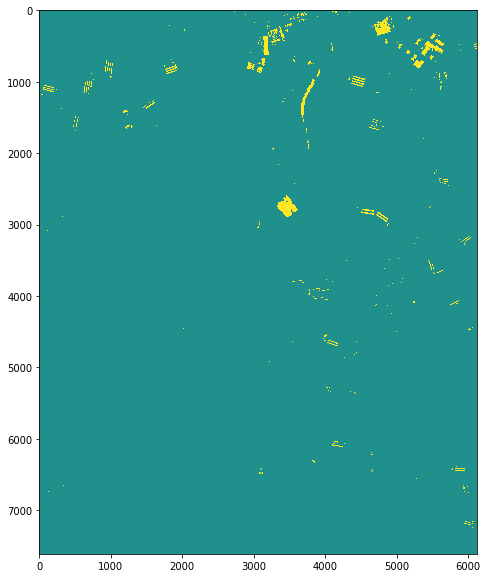

In [116]:
plot_tile("../landcover_scripts/m_3807518_se_18_1_20170611_ae_even_best.tif")

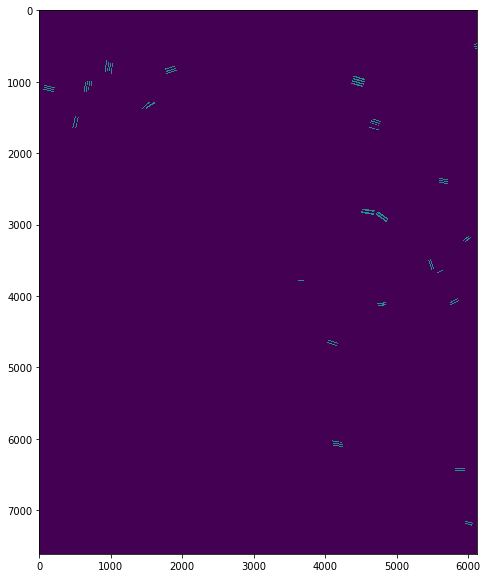

In [117]:
plot_tile("./m_3807518_se_18_1_201700611_rasterized.tif")

TypeError: Image data of dtype <U90 cannot be converted to float

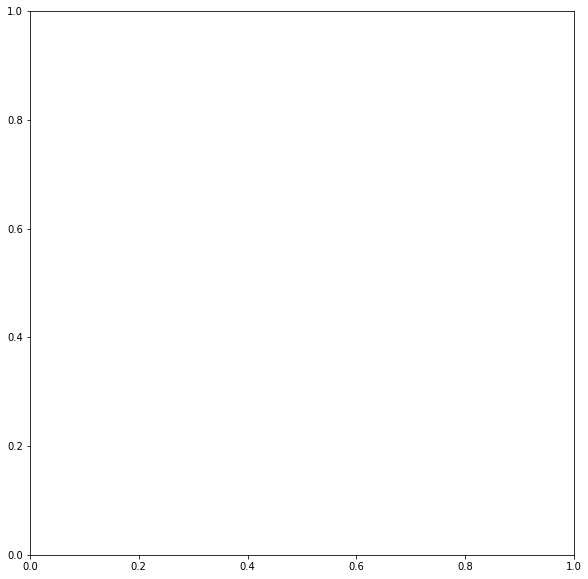

In [118]:
plt.imshow("../../../media/disk2/datasets/maaryland_naip_2017/38075/m_3807518_se_18_1_20170611.200.jpg")